## Data smoothing using rolling mean

- A rolling mean is simply the mean of a certain number of previous periods in a time series.

In [13]:
import numpy as np
import pandas as pd

#make this example reproducible
np.random.seed(0)

#create dataset
period = np.arange(1, 101, 1)
leads = np.random.uniform(1, 20, 100)
sales = 60 + 2*period + np.random.normal(loc=0, scale=.5*period, size=100)
df = pd.DataFrame({'period': period, 'leads': leads, 'sales': sales})

#view first 10 rows
df.head(10)

,period,leads,sales
0,1,11.427457,61.417425
1,2,14.588598,64.900826
2,3,12.452504,66.698494
3,4,11.352780,64.927513
4,5,9.049441,73.720630
5,6,13.271988,77.687668
6,7,9.314157,78.125728
7,8,17.943687,75.280301
8,9,19.309592,73.181613
9,10,8.285389,85.272259


In [16]:
#find rolling mean of previous 5 sales periods
df['rolling_sales_5'] = df['sales'].rolling(5).mean()

#view first 10 rows
df.head(10)

,period,leads,sales,rolling_sales_5
0,1,11.427457,61.417425,NaN
1,2,14.588598,64.900826,NaN
2,3,12.452504,66.698494,NaN
3,4,11.352780,64.927513,NaN
4,5,9.049441,73.720630,66.332978
5,6,13.271988,77.687668,69.587026
6,7,9.314157,78.125728,72.232007
7,8,17.943687,75.280301,73.948368
8,9,19.309592,73.181613,75.599188
9,10,8.285389,85.272259,77.909514


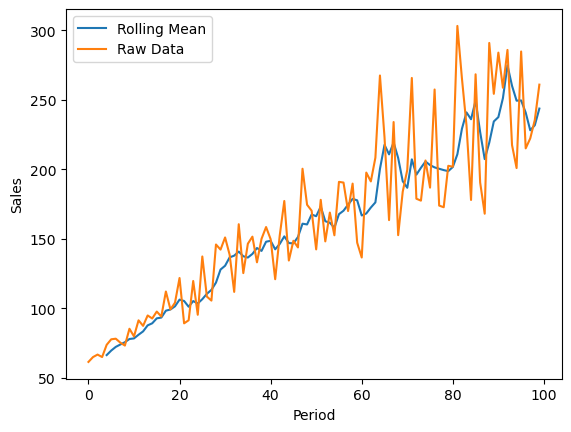

In [18]:
import matplotlib.pyplot as plt
plt.plot(df['rolling_sales_5'], label='Rolling Mean')
plt.plot(df['sales'], label='Raw Data')
plt.legend()
plt.ylabel('Sales')
plt.xlabel('Period')
plt.show()